<a href="https://colab.research.google.com/github/znavezz/Machine-Learning/blob/main/KMeans_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 4</center></h3>
<h4><center>K-Means and PCA<center></h4>

**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 4/7/2024 at 23:59

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


### **2. Data**

Generate a 2D dataset

In [ ]:
## Generate 2D data
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

<ipython-input-4-5d2f93b9a0ca>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


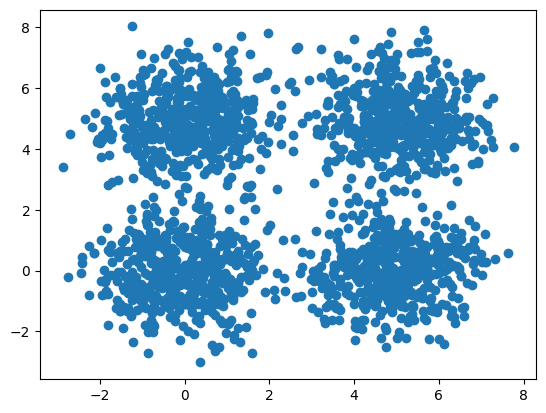

In [ ]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [ ]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X.
                                # This can be useful for the next tasks.

        self.labels_ = None     # Here you should store the final labels.
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.

        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit(self, X):
        self.X_fit_ = X
        # Initialize centroids randomly from the dataset
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for i in range(self.max_iter):
          #Assign labels based on closest centroid
          labels = self._get_labels(X)
          self.labels_history.append(labels)

          #Calculate new centroids
          new_centroids = self._get_centroids(X, labels)
          self.centroids_history.append(new_centroids)

          #Calculate cost
          cost = self._calculate_cost(X)
          self.costs.append(cost)

          # Check for convergence (if all centroids do not change)
          if np.all(new_centroids == self.centroids):
            break
          self.centroids = new_centroids

        #Store final labels and centroids
        self.labels_ = labels
        self.centroids = new_centroids

    def predict(self, X):
        return self._get_labels(X)

    def _get_distances(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(self.centroids):
          distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        return distances

    def _get_labels(self, X):
        distances = self._get_distances(X)
        labels = np.argmin(distances, axis=1)
        return labels

    def _get_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
          centroids[i, :] = np.mean(X[labels == i], axis=0)
        return centroids

    def _calculate_cost(self, X):
        distances = self._get_distances(X)
        min_distances = np.min(distances, axis=1)
        cost = np.sum(min_distances ** 2)
        return cost




Run the algorithm on the 2D dataset

In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

Plot a graph of the costs as a function of the iterations

[25983.770036394635, 10720.682063975284, 9018.459134578396, 7702.712947596879, 5073.324302662631, 3884.7152042909847, 3853.7135522714602, 3853.2297078225083, 3853.188526720804]


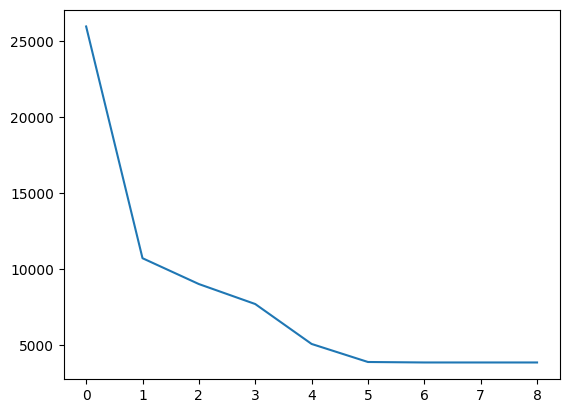

In [ ]:
costs = kmeans.costs
print(costs)
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: 16348.28495138423<br>
3 clusters: 9878.282513664537<br>
4 clusters: 3732.228913949687<br>
6 clusters: 3062.1182717785096<br>
8 clusters: 2545.14082846785<br>
10 clusters: 2079.440526677972
<br>
20 clusters: 1082.4816597997956<br>

In [ ]:
cluster2 = KMeans(n_clusters=2)
cluster2.fit(X)
cluster2_cost = cluster2.costs[-1]
print(f"cluster2 cost: {cluster2_cost}")
cluster3 = KMeans(n_clusters=3)
cluster3.fit(X)
cluster3_cost = cluster3.costs[-1]
print(f"cluster3 cost: {cluster3_cost}")
cluster4 = KMeans(n_clusters=4)
cluster4.fit(X)
cluster4_cost = cluster4.costs[-1]
print(f"cluster4 cost: {cluster4_cost}")
cluster6 = KMeans(n_clusters=6)
cluster6.fit(X)
cluster6_cost = cluster6.costs[-1]
print(f"cluster6 cost: {cluster6_cost}")
cluster8 = KMeans(n_clusters=8)
cluster8.fit(X)
cluster8_cost = cluster8.costs[-1]
print(f"cluster8 cost: {cluster8_cost}")
cluster10 = KMeans(n_clusters=10)
cluster10.fit(X)
cluster10_cost = cluster10.costs[-1]
print(f"cluster10 cost: {cluster10_cost}")
cluster20 = KMeans(n_clusters=20)
cluster20.fit(X)
cluster20_cost = cluster20.costs[-1]
print(f"cluster20 cost: {cluster20_cost}")

cluster2 cost: 16336.973227809764
cluster3 cost: 9881.988058967316
cluster4 cost: 3853.188526720804
cluster6 cost: 3140.917559969547
cluster8 cost: 2815.695764038372
cluster10 cost: 2299.625391473458
cluster20 cost: 1108.19669160122


Now write a code that plots the clusters and the locations of the centroids at each iteration

In [ ]:
def plot_clusters(self):
  colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange']
  for i, (labels, centroids) in enumerate(zip(self.labels_history, self.centroids_history)):
    plt.figure(figsize=(8,6))
    for j in range(self.n_clusters):
      points = self.X_fit_[labels == j]
      plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[j % len(colors)], label=f'Cluster {j+1}')
      plt.scatter(centroids[j, 0], centroids[j, 1], s=150, c='black', linewidth=3, marker='x', label='Centroid', edgecolor='black')
      plt.scatter(centroids[j, 0], centroids[j, 1], s=100, c=colors[j % len(colors)], linewidth=2, marker='x', label='Centroid', edgecolor='black')
    plt.title(f'Iteration {i+1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

<ipython-input-11-4bb305e42dc5>:8: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centroids[j, 0], centroids[j, 1], s=150, c='black', linewidth=3, marker='x', label='Centroid', edgecolor='black')
<ipython-input-11-4bb305e42dc5>:9: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centroids[j, 0], centroids[j, 1], s=100, c=colors[j % len(colors)], linewidth=2, marker='x', label='Centroid', edgecolor='black')


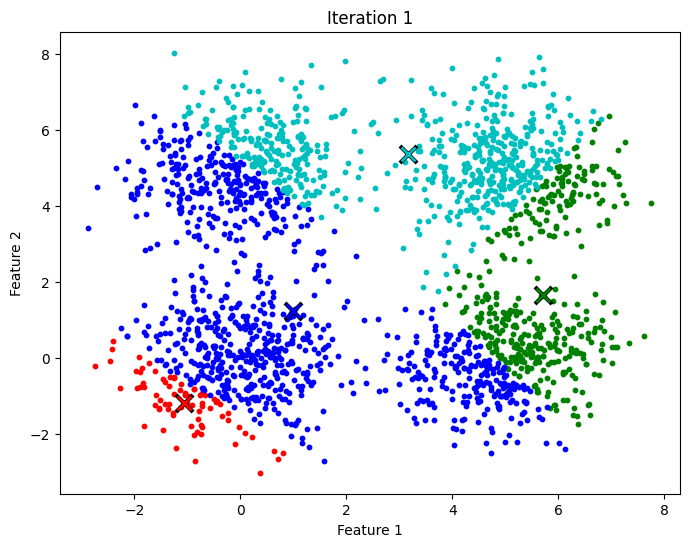

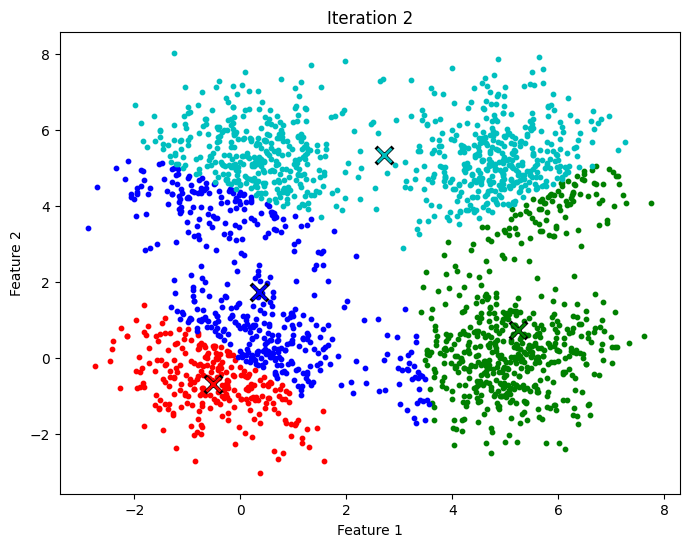

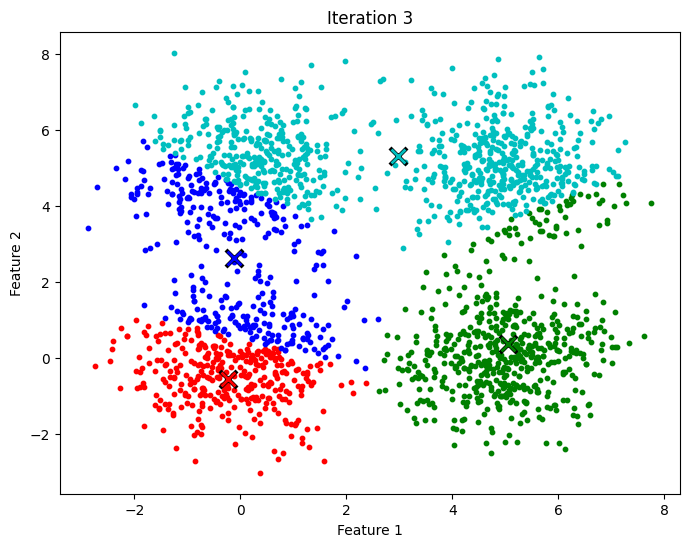

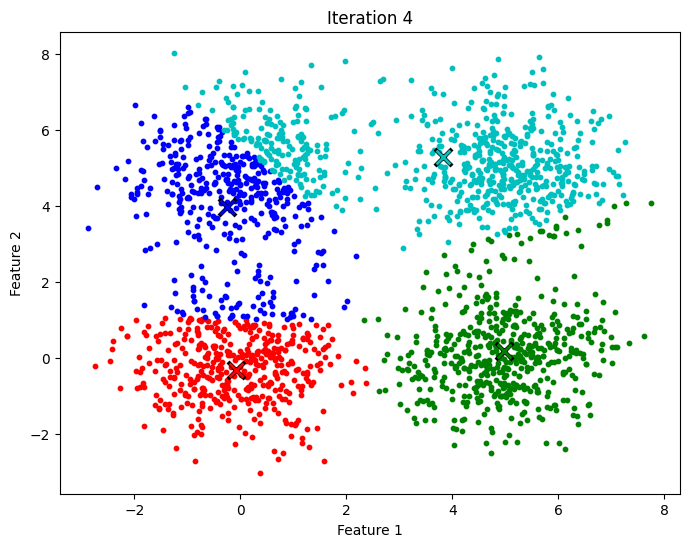

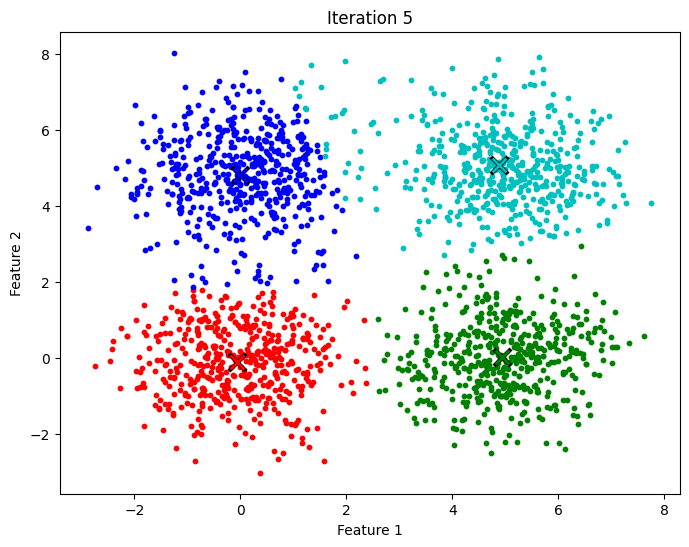

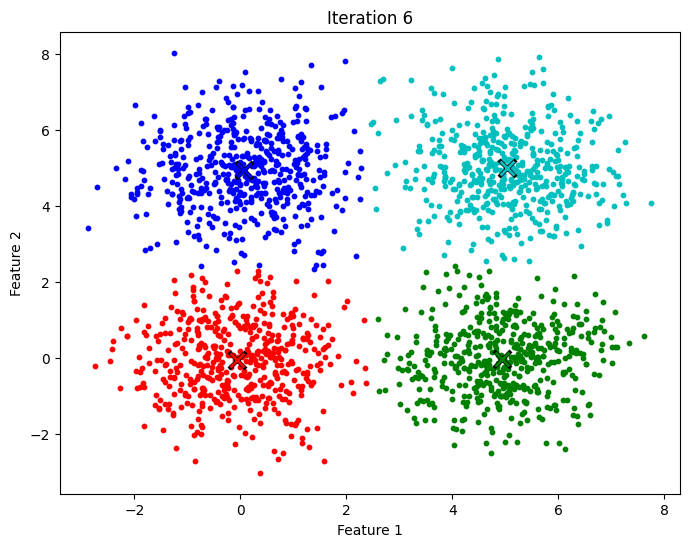

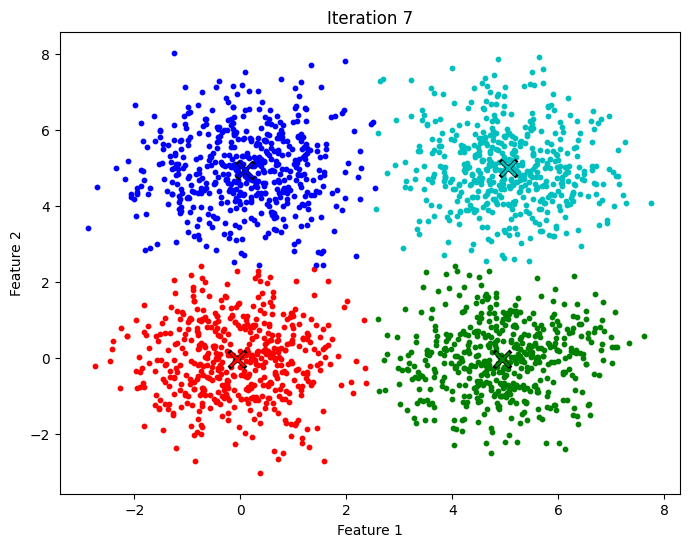

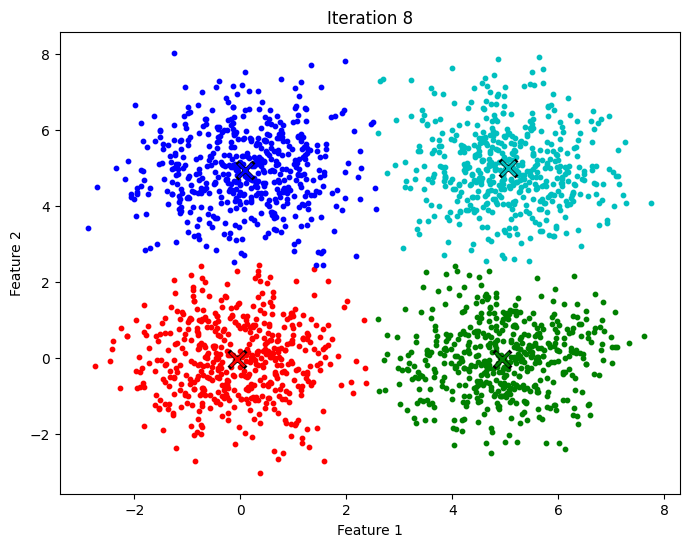

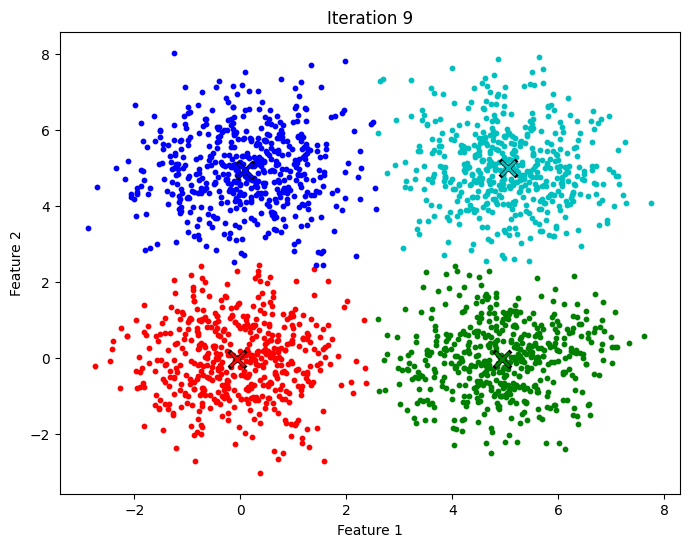

In [ ]:
plot_clusters(kmeans)

## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [ ]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None #Eigenvectors
        self.mean = None #Mean of the dataset

    def fit(self, X):
        #Center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        #Calculate the covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        #Calculate the eigenvectors and eigenvalues of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        #Sort the eigenvectors by decreasing eigenvalues
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.V = np.real(eigenvectors[:, sorted_indices])

    def transform(self, X, n_dimentions):
        # Center the data using the mean from the fit step
        X_centered = X - self.mean

        # Project the data onto the top n_dimentions eigenvectors
        X_reduced = np.dot(X_centered, self.V[:, :n_dimentions])

        return X_reduced




Run the algorithm on MNIST dataset.

In [ ]:
pca = PCA()
pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2)

Plot the data in the top 2 principal component space.

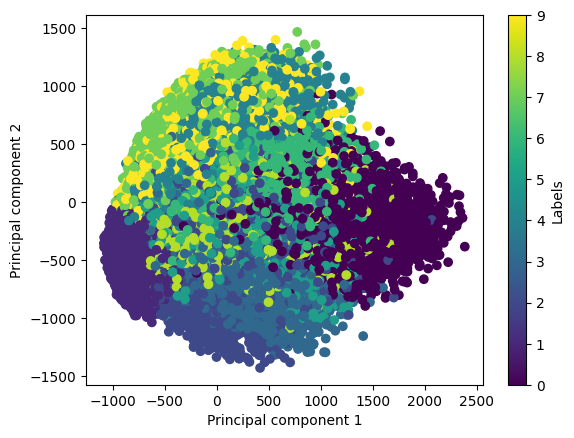

In [ ]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

In [ ]:
print(X.shape)


(70000, 784)


As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

In [ ]:
# Compute v^T*V and V*V^T
V_reduced = pca.V[:, :X_reduced.shape[1]]
VtV = np.dot(V_reduced.T, V_reduced)
VVt = np.dot(V_reduced, V_reduced.T)


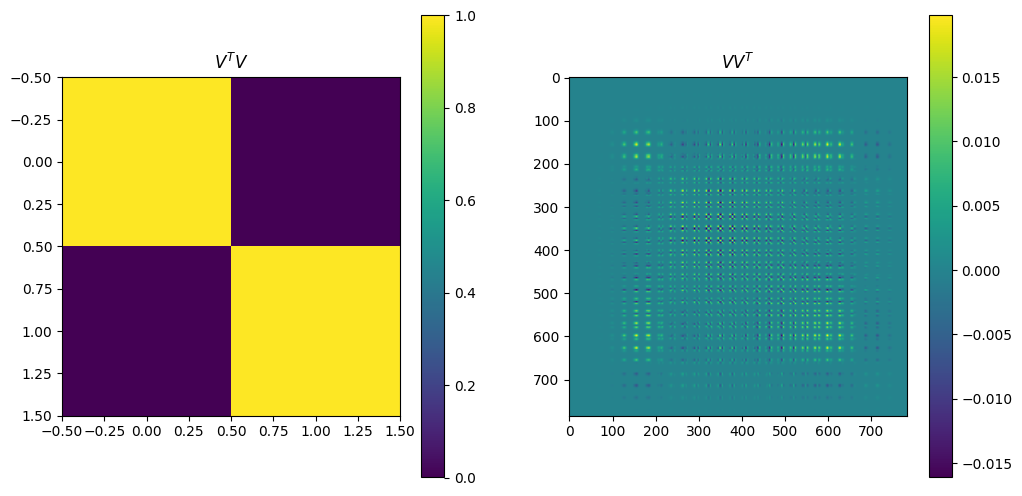

In [ ]:
# Plot V^T V and V V^T
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

cax1 = ax[0].imshow(VtV, interpolation='nearest', cmap='viridis')
ax[0].set_title(r'$V^T V$')
fig.colorbar(cax1, ax=ax[0])

# Plot V V^T
cax2 = ax[1].imshow(VVt, interpolation='nearest', cmap='viridis')
ax[1].set_title(r'$VV^T$')
fig.colorbar(cax2, ax=ax[1])

plt.show()

Your Explanation:
# Differences Between $ V^T V $ and $ VV^T $

**$ V^T V $**:

- **Size**: $ r \times r $, where $ r $ is the number of principal components.
- **Properties**: Since $ V $ is composed of orthonormal eigenvectors, $ V^T V $ is an identity matrix, confirming the orthogonality and normalization of the principal components.
- **Geometric Interpretation**: This orthonormality ensures that the transformation using
$ V $does not distort the geometric properties of the data. Lengths and angles in the subspace spanned by the principal components remain true to those in the original space.

**$ VV^T $**:

- **Size**: $ d \times d $, where $ d $ is the number of original features.
- **Properties**: $ VV^T $ is a symmetric and idempotent projection matrix, mapping vectors from the original feature space onto the subspace spanned by the top $ r $ principal components.
- **Geometric Interpretation**: Illustrates how each feature in the original dataset contributes to the principal components and how features interact after projection, indicating feature retention and interaction in the reduced subspace.

**In summary**:
- $ V^T V $ confirms the orthonormality of the principal components.
- $ VV^T $ demonstrates the projection of the original high-dimensional data onto the lower-dimensional principal component space, highlighting features retention and interactions.


Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [ ]:
def pca_reconstruction(x, n_dimentions):
  # Create PCA object and fit the data to it
    pca = PCA()
    pca.fit(x)

    #Project the data to the reduced dimension
    x_reduced = pca.transform(x, n_dimentions)

    # Recontruct the data from the reduced dimensions
    x_centered_reconstruct = np.dot(x_reduced, pca.V[:, :n_dimentions].T)
    x_reconstructed = x_centered_reconstruct + pca.mean

    return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


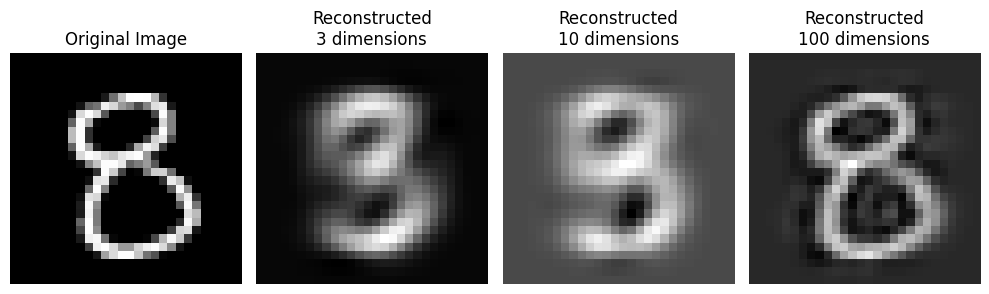

In [ ]:
#Sample a random image from the dataset
np.random.seed(18)
random_index = np.random.randint(0, X.shape[0])
random_image = X[random_index]

# Perform reconstruction for different dimensions
dimensions = [3, 10, 100]
reconstructed_images = []

for n_dims in dimensions:
  X_reconstructed = pca_reconstruction(X, n_dims)
  reconstructed_images.append(X_reconstructed[random_index])

# Plot the original and reconstructed images
fig, axes = plt.subplots(1, len(dimensions) + 1, figsize=(10, 5))

# Original image
axes[0].imshow(random_image.reshape(28, 28), cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Reconstructed images
for i, (n_dims, recon_image) in enumerate(zip(dimensions, reconstructed_images)):
    axes[i + 1].imshow(recon_image.reshape(28, 28), cmap='gray')
    axes[i + 1].set_title(f'Reconstructed\n{n_dims} dimensions')
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()